In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('C:/Users/User/Documents/UAS Data Mining/UAS Roslin/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_fix:
    diabetes[column] = diabetes[column].replace(0, diabetes[column].median())

print((diabetes[columns_to_fix] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [9]:
Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

diabetes = diabetes[(diabetes['Insulin'] >= lower_bound) & (diabetes['Insulin'] <= upper_bound)]

In [10]:
print(f"Jumlah duplikat: {diabetes.duplicated().sum()}")

diabetes = diabetes.drop_duplicates()

print(f"Jumlah data setelah menghapus duplikat: {diabetes.shape[0]}")

Jumlah duplikat: 0
Jumlah data setelah menghapus duplikat: 719


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes[columns_to_fix] = scaler.fit_transform(diabetes[columns_to_fix])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes[columns_to_fix] = scaler.fit_transform(diabetes[columns_to_fix])

In [13]:
print(diabetes['Outcome'].value_counts())

Outcome
0    478
1    241
Name: count, dtype: int64


In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               719 non-null    int64  
 1   Glucose                   719 non-null    float64
 2   BloodPressure             719 non-null    float64
 3   SkinThickness             719 non-null    float64
 4   Insulin                   719 non-null    float64
 5   BMI                       719 non-null    float64
 6   DiabetesPedigreeFunction  719 non-null    float64
 7   Age                       719 non-null    int64  
 8   Outcome                   719 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.2 KB


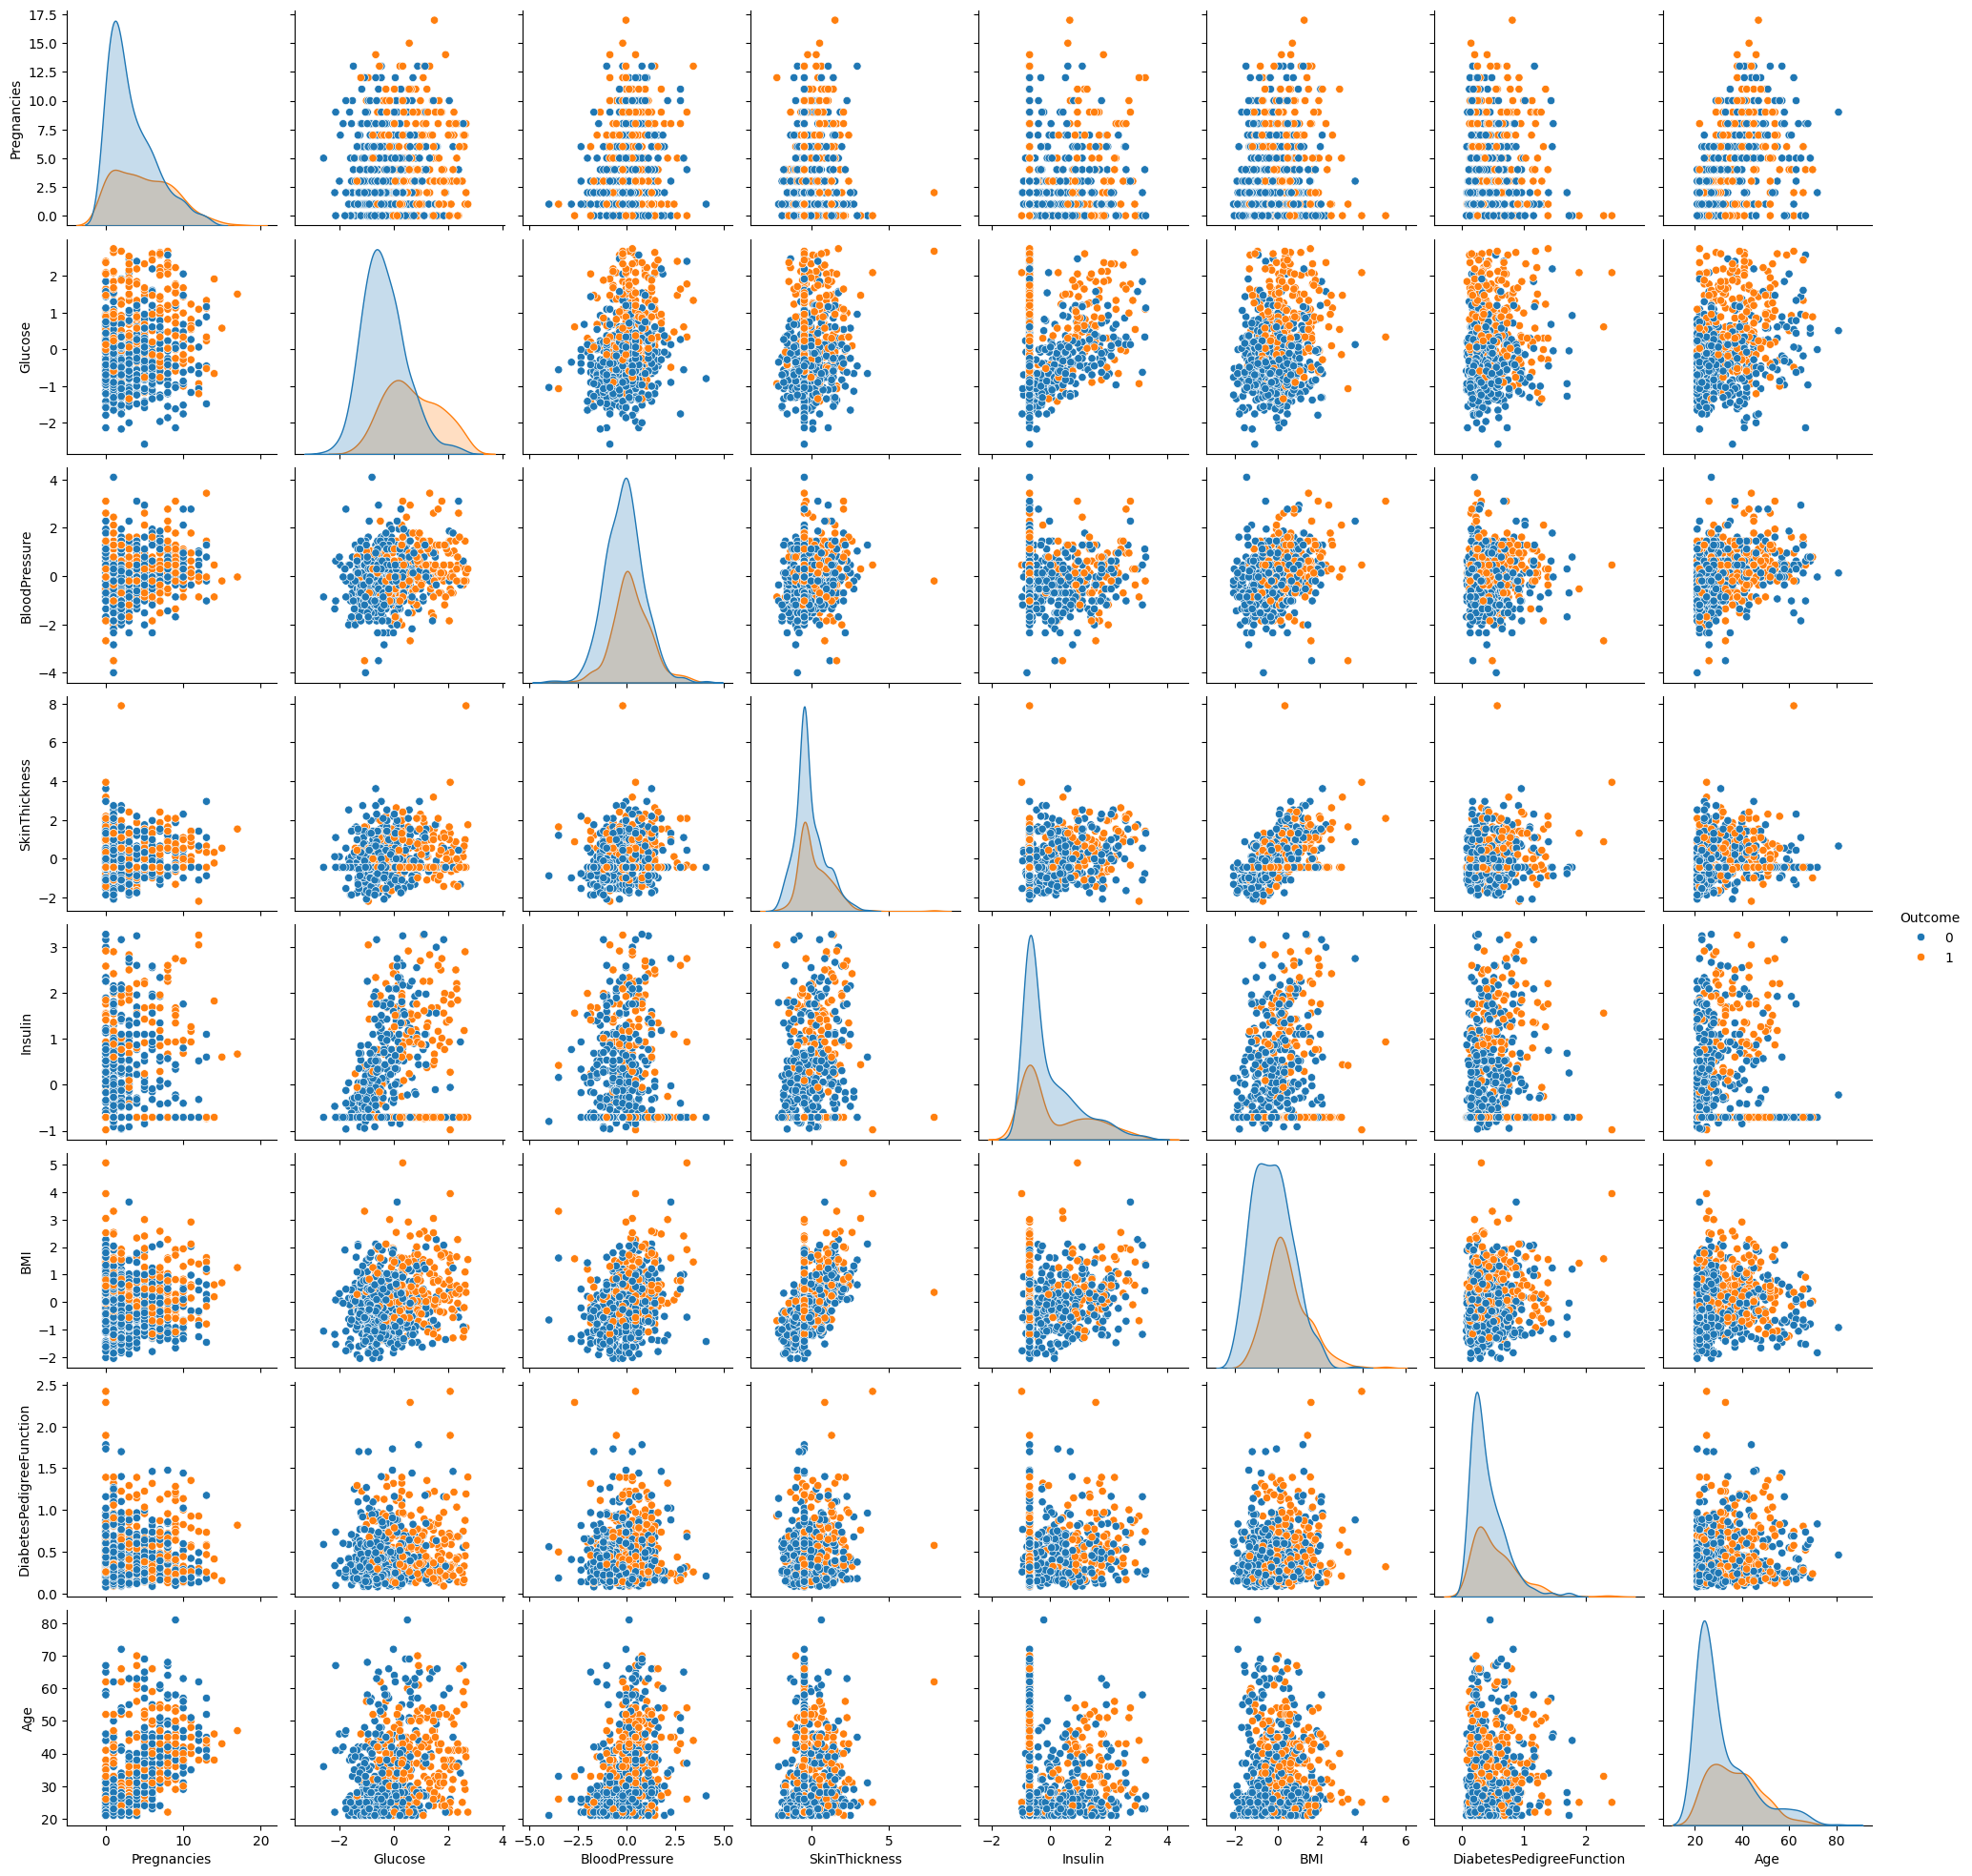

In [24]:
sns.pairplot(diabetes, hue="Outcome")
plt.show()

In [15]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.1505056351863809


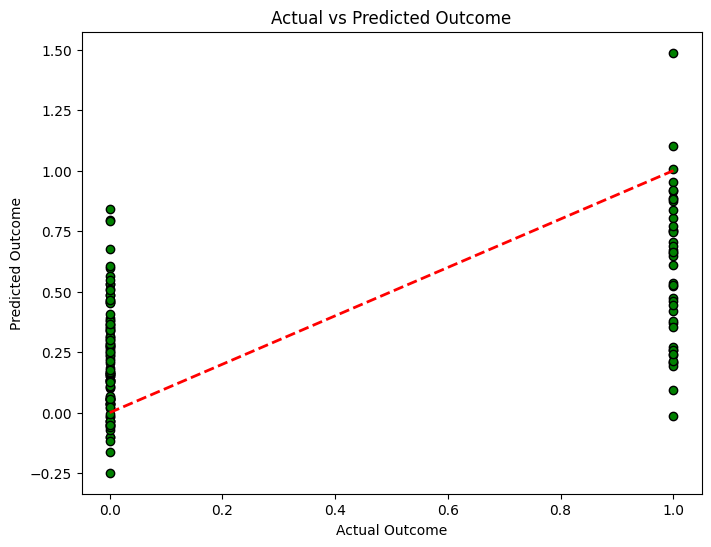

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Actual vs Predicted Outcome')
plt.show()

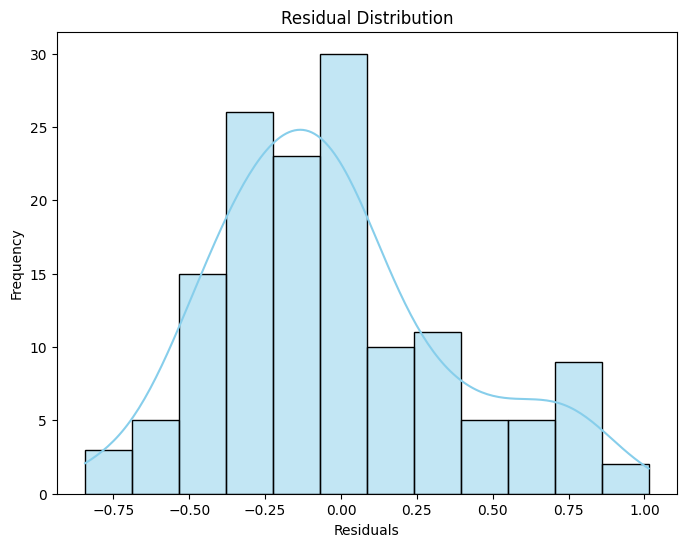

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [23]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')
loaded_model = joblib.load('linear_regression_model.pkl')